## Make AIC  tables

In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import numpy as np 

from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.io
from scipy.io import loadmat
import pandas as pd

import matplotlib.style as style 
from matplotlib.offsetbox import AnchoredText

from tqdm import tqdm
from numpy.random import RandomState

import imp
import time
from timeit import default_timer as timer
import matplotlib.patches as patches
import pickle as pickle
import os
import argparse

#get_ipython().run_line_magic('matplotlib', 'inline')
#get_ipython().run_line_magic('autosave', '5')
sns.set(style = 'whitegrid', context='poster', rc={"lines.linewidth": 2.5})
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.patches as patches
#mpl.use('Agg')


#%matplotlib inline 
#%autosave 5
import context_helper
from context_helper import folders


from scipy.signal import decimate as dc
#%matplotlib inline 
#%autosave 5


model='GPT2'

home_dir = folders['tiger']
save_plot='Y'
results_dir= home_dir + 'results/revision1/'
log_dir = home_dir + 'logs/'


In [2]:
%matplotlib inline

In [35]:
drift_val=[3,5,10]

analyses=['KLDivergence', 'Surprise', 'Entropy','GPT2Embed-cosine']

In [36]:
def make_aic_data_frame(transient_in):
    aic=[]
    counter=1
    for analysis in analyses:
        if transient_in:
            for drift in drift_val:
            
                analysis_file= results_dir + analysis + 'Ratio_Average_Reynolds_drift%i_model_aic_noZscoremean_ic.csv' % drift
                df_in = pd.read_csv(analysis_file)
                aic.append(df_in['Mean-AIC-Value'].to_numpy())
                
                #print(aic)
                           
                #print(counter)
                counter=counter+1
        else:
            analysis_file= results_dir + analysis + '_model_aic_yesZscoremean_ic.csv'
            df_in = pd.read_csv(analysis_file)
            aic.append(df_in['Mean-AIC-Value'].to_numpy())
            

     

    aic=np.array(aic)
    #print(aic.shape)
    df_aic=pd.DataFrame(aic)
    
    if transient_in:
        #print('hello0')
        #print(df_aic)
        df_aic['analysis']=['BS1', 'BS2', 'BS3', 'Surprise1', 'Surprise2', 'Surprise3','Entropy1','Entropy2','Entropy3','Cosine1','Cosine2','Cosine3']
        df_aic['group']=['BS', 'BS', 'BS', 'Surprise', 'Surprise', 'Surprise','Entropy','Entropy','Entropy','Cosine','Cosine','Cosine']

        
    else:
        df_aic['analysis']=['BS','Surprise', 'Entropy','Cosine']
        df_aic['group']=['BS',  'Surprise', 'Entropy','Cosine']

    
        
    df_aic.rename(columns={0:20,1:50,2:100,3:150,4:200}, inplace=True)
    

    df_aic=pd.melt(df_aic,id_vars=['analysis','group'], var_name='windows',value_name='aic')
    
    

    return df_aic




In [37]:
transient=True
df_transient_aic =make_aic_data_frame(transient)
df_non_transient_aic =make_aic_data_frame(False)

In [8]:
df_transient_aic

,analysis,group,windows,aic
0,BS1,BS,20,-33030.779628
1,BS2,BS,20,-33030.879364
2,BS3,BS,20,-33025.147611
3,Surprise1,Surprise,20,-32981.164260
4,Surprise2,Surprise,20,-32987.631490
5,Surprise3,Surprise,20,-32988.672192
6,Entropy1,Entropy,20,-32989.078912
7,Entropy2,Entropy,20,-32995.166431
8,Entropy3,Entropy,20,-32999.795205
9,Cosine1,Cosine,20,-32984.878521


In [38]:
# Add penalty for extra parameters in the transient models
df_transient_aic['aic']=df_transient_aic['aic']+2

In [10]:
df_transient_aic

,analysis,group,windows,aic
0,BS1,BS,20,-33028.779628
1,BS2,BS,20,-33028.879364
2,BS3,BS,20,-33023.147611
3,Surprise1,Surprise,20,-32979.164260
4,Surprise2,Surprise,20,-32985.631490
5,Surprise3,Surprise,20,-32986.672192
6,Entropy1,Entropy,20,-32987.078912
7,Entropy2,Entropy,20,-32993.166431
8,Entropy3,Entropy,20,-32997.795205
9,Cosine1,Cosine,20,-32982.878521


### New AIC Plot

In [39]:
df_combined_aic=pd.concat([df_transient_aic,df_non_transient_aic])

In [40]:
df_combined_aic.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59,  0,  1,  2,  3,  4,  5,  6,  7,
             8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
           dtype='int64')

In [41]:
df_combined_aic.reset_index(drop=True, inplace=True)

In [42]:
ind1=np.array([0,1,2,60,3,4,5,61,6,7,8,62,9,10,11,63])

In [43]:
ind2=ind1+12
ind2
ind3=ind2+12
ind4=ind3+12
ind5=ind4+12


In [44]:
newind=np.concatenate((ind1,ind2), axis=0)
newind=np.concatenate((newind,ind3), axis=0)
newind=np.concatenate((newind,ind4), axis=0)
newind=np.concatenate((newind,ind5), axis=0)

print(newind)

[  0   1   2  60   3   4   5  61   6   7   8  62   9  10  11  63  12  13
  14  72  15  16  17  73  18  19  20  74  21  22  23  75  24  25  26  84
  27  28  29  85  30  31  32  86  33  34  35  87  36  37  38  96  39  40
  41  97  42  43  44  98  45  46  47  99  48  49  50 108  51  52  53 109
  54  55  56 110  57  58  59 111]


In [45]:
nt_ind=np.arange(3,80,4)

In [46]:
nt_ind

array([ 3,  7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67,
       71, 75, 79])

In [47]:
newind[nt_ind]=np.arange(60,80)

In [48]:
newind

array([ 0,  1,  2, 60,  3,  4,  5, 61,  6,  7,  8, 62,  9, 10, 11, 63, 12,
       13, 14, 64, 15, 16, 17, 65, 18, 19, 20, 66, 21, 22, 23, 67, 24, 25,
       26, 68, 27, 28, 29, 69, 30, 31, 32, 70, 33, 34, 35, 71, 36, 37, 38,
       72, 39, 40, 41, 73, 42, 43, 44, 74, 45, 46, 47, 75, 48, 49, 50, 76,
       51, 52, 53, 77, 54, 55, 56, 78, 57, 58, 59, 79])

In [49]:
df_combined_aic_newind=df_combined_aic.reindex(newind)

In [50]:
df_combined_aic.loc[df_combined_aic['windows']==20]

,analysis,group,windows,aic
0,BS1,BS,20,-33028.779628
1,BS2,BS,20,-33028.879364
2,BS3,BS,20,-33023.147611
3,Surprise1,Surprise,20,-32979.164260
4,Surprise2,Surprise,20,-32985.631490
5,Surprise3,Surprise,20,-32986.672192
6,Entropy1,Entropy,20,-32987.078912
7,Entropy2,Entropy,20,-32993.166431
8,Entropy3,Entropy,20,-32997.795205
9,Cosine1,Cosine,20,-32982.878521


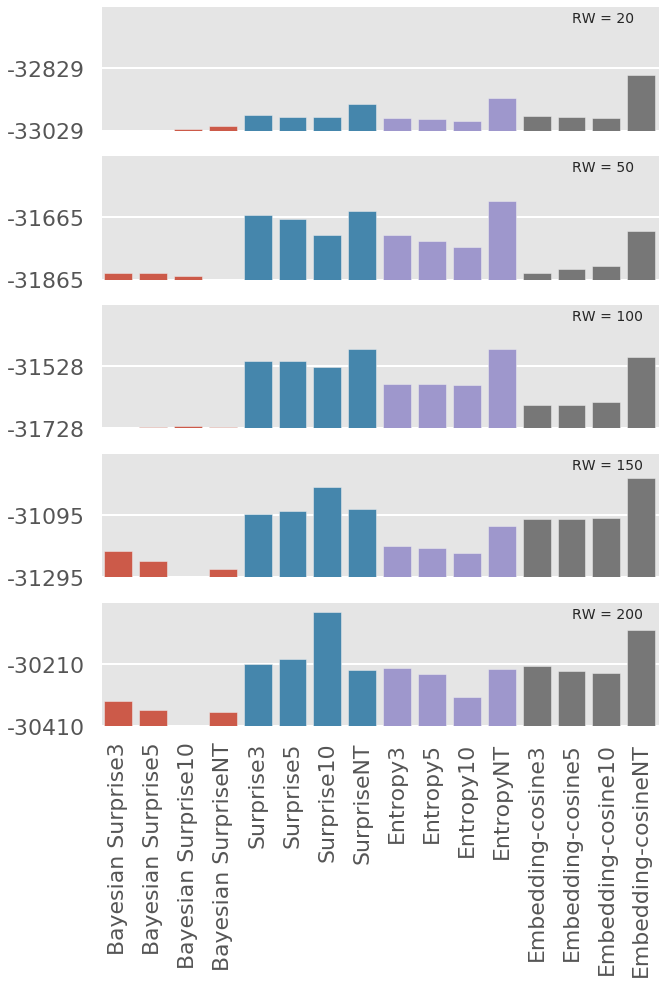

In [52]:
plt.style.use('ggplot')
f,ax = plt.subplots(5,1, figsize=(10,20))
win=[20, 50, 100, 150, 200]
xlab1= ['Bayesian Surprise3','Bayesian Surprise5','Bayesian Surprise10','Bayesian SurpriseNT','Surprise3','Surprise5','Surprise10','SurpriseNT','Entropy3','Entropy5','Entropy10', 'EntropyNT','Embedding-cosine3','Embedding-cosine5','Embedding-cosine10','Embedding-cosineNT']
for i in range(5):
    
    min_val=df_combined_aic_newind['aic'].loc[df_combined_aic_newind['windows']==win[i]].min()
    new_df=df_combined_aic_newind.loc[df_combined_aic_newind['windows']==win[i]]
    new_df['aic']=new_df['aic']-min_val

    sns.barplot(data=new_df ,x='analysis', y='aic',ax=ax[i], hue='group', dodge=False)
    ylab1=[round(min_val),round(min_val)+200]

    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xticklabels('')
    ax[i].set_ylim(0, 400)
    ax[i].set_yticklabels(ylab1)
    ax[i].get_legend().remove()
    #ax[i].invert_yaxis()
    ax[i].text(13, 350, 'RW = %i' % win[i], transform=ax[i].transData, fontsize=14)

    #ax[0].set_ylabel('Mean AIC', fontsize="24")
ax[4].set_xticklabels(xlab1,rotation=90)

plt.subplots_adjust(left=None, bottom=1.5, right=None, top=2, wspace=0.5, hspace=None)
plt.savefig(results_dir + '/%s_comparison.pdf' % 'AIC' , bbox_inches="tight")